In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
ConsumerKey = "5Rhf7GTCvDUVqfOAE6G7zh2T3"
ConsumerSecret = "E7jKCkzyF6my0j7VxMYNyLMHyVyxz8H7MJjz4Z6stutaPgZUiS"
AccessToken = "1052018922357047296-r6JApBX81nkMBGje7OCsgu4v3x23uc"
AccessTokenSecret = "fQxVMl8QL9fIQLfyPT92TjTac6dJ4AqkVRj344anBTLWe"

In [3]:
auth = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
auth.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
posts = api.user_timeline(screen_name="amazon", count = 1000, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) @robertmac13 Oh no! We encourage not including personally identifiable information over social media. If you’d like to delete your Tweet, click the "v" caret icon and select "Delete Tweet." We'd like to look into this here: https://t.co/3aGNamWvd1. -Braden

2) @SamFotofiend While we're unable to view or access details here, we'd like to help. Will you tell us more about what's happened? Please don't share order or account specifics, as social media is a public platform. -Bre

3) @notyourjob Hi there. We're sorry for the poor experience. So we can look into this with you, please reach out to us here: https://t.co/YyJL5t4r2h. We're happy to help however we can! -Bryan

4) @Kryptonliveson Thanks. We've got it, and we'll be contacting you soon. -Candy

5) @aj_de99 Hello! So we can better assist, could you please confirm what marketplace you've ordered from (.co.uk, .com, .ca, etc.)? We're here to help. -Teri



In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 10 of Data
df.head() 

,Tweets
0,@robertmac13 Oh no! We encourage not including...
1,@SamFotofiend While we're unable to view or ac...
2,@notyourjob Hi there. We're sorry for the poor...
3,"@Kryptonliveson Thanks. We've got it, and we'l..."
4,"@aj_de99 Hello! So we can better assist, could..."


In [6]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing Text and Number
  text = re.sub(r'#','', text) #removing Hastag
  text = re.sub(r'RT[\s]+','', text) #removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #removing hyperlink

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,Oh no! We encourage not including personally ...
1,While we're unable to view or access details ...
2,Hi there. We're sorry for the poor experience...
3,"Thanks. We've got it, and we'll be contacting..."
4,"_de99 Hello! So we can better assist, could yo..."
...,...
195,_4 We'd love to help your class get ready for ...
196,"We love to read, journal, and WE LOVE US SOME..."
197,You're very welcome! 💗 🤗 We can bear-ly conta...
198,That's some pretty next level hide-and-seek r...


In [7]:
# Create a function to get subjeectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 'Subjectiviy' & 'Polarity'
df['Subjectiviy'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectiviy,Polarity
0,Oh no! We encourage not including personally ...,0.283333,0.066667
1,While we're unable to view or access details ...,0.283333,0.008333
2,Hi there. We're sorry for the poor experience...,0.866667,0.033333
3,"Thanks. We've got it, and we'll be contacting...",0.200000,0.200000
4,"_de99 Hello! So we can better assist, could yo...",0.500000,0.500000
...,...,...,...
195,_4 We'd love to help your class get ready for ...,0.400000,0.233333
196,"We love to read, journal, and WE LOVE US SOME...",0.480000,0.262500
197,You're very welcome! 💗 🤗 We can bear-ly conta...,0.750000,0.812500
198,That's some pretty next level hide-and-seek r...,0.580511,0.400794


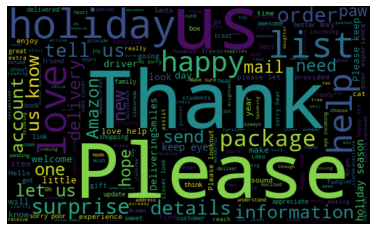

In [8]:
#word cloud visualization

allWords = ''.join([twts for twts in df['Tweets']])
WordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
#create a function to compute negative (-1) neutral (0) and positive (+1) analysis

def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectiviy,Polarity,Analysis
0,Oh no! We encourage not including personally ...,0.283333,0.066667,positive
1,While we're unable to view or access details ...,0.283333,0.008333,positive
2,Hi there. We're sorry for the poor experience...,0.866667,0.033333,positive
3,"Thanks. We've got it, and we'll be contacting...",0.200000,0.200000,positive
4,"_de99 Hello! So we can better assist, could yo...",0.500000,0.500000,positive
...,...,...,...,...
195,_4 We'd love to help your class get ready for ...,0.400000,0.233333,positive
196,"We love to read, journal, and WE LOVE US SOME...",0.480000,0.262500,positive
197,You're very welcome! 💗 🤗 We can bear-ly conta...,0.750000,0.812500,positive
198,That's some pretty next level hide-and-seek r...,0.580511,0.400794,positive


In [10]:
print('Negative tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1)  We get your disappointment. We would like to have a closer look into this. Please share your details here:  We'll check and get back to you soon with an update. Appreciate your patience and understanding. -Paul

2)  Hi. We're sorry to hear about the poor experience. Without posting account information, please tell us more about what's going on. We'd like to help in any way we can! -Trevin

3)  Hello. We apologize for the poor delivery experience. Just to clarify, which carrier was assigned to your delivery here:  -Odalisa

4)  It's never our aim to leave you feeling frustrated. As we don't have access to customer accounts, please fill out this form:  This will allow us to take a closer look. -Brielle

5)  Every order deserves a little holiday sparkle! 😊 📦 ✨

6)  It's like past you, sent a gift to future you. And they didn't even realize at the time that they were sending a gift. 🤷🎁😂

7)  We're sorry for the poor experience! We'd like to help. To confirm, have we m

In [11]:
print('Positive tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1)  Oh no! We encourage not including personally identifiable information over social media. If you’d like to delete your Tweet, click the "v" caret icon and select "Delete Tweet." We'd like to look into this here:  -Braden

2)  While we're unable to view or access details here, we'd like to help. Will you tell us more about what's happened? Please don't share order or account specifics, as social media is a public platform. -Bre

3)  Hi there. We're sorry for the poor experience. So we can look into this with you, please reach out to us here:  We're happy to help however we can! -Bryan

4)  Thanks. We've got it, and we'll be contacting you soon. -Candy

5) _de99 Hello! So we can better assist, could you please confirm what marketplace you've ordered from (.co.uk, .com, .ca, etc.)? We're here to help. -Teri

6)  Hello! If you could please send us your details here:  we'd be happy to take a closer look into this for you. Let us know when it's in! -Candy

7)  Please con

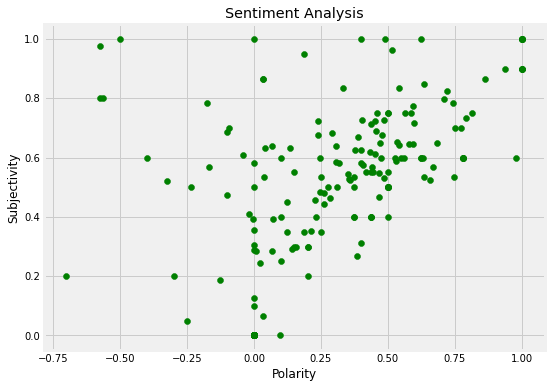

In [12]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectiviy'][i], color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
#persentasepositiv

potweets = df[df.Analysis == 'positive']
potweets = potweets['Tweets']

round ( (potweets.shape[0] / df.shape[0]) *100, 1)

70.5

In [14]:
#persentasenegatif

netweets = df[df.Analysis == 'negative']
netweets = netweets['Tweets']

round ( (netweets.shape[0] / df.shape[0]) *100, 1)

9.5

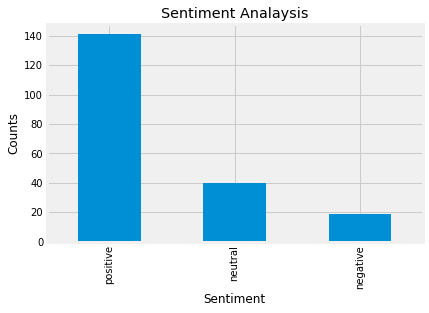

In [15]:
#show value count

df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()